In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid
from pykrige.uk import UniversalKriging
import geopandas as gpd

In [3]:
Datos = pd.read_csv("mud.csv")

In [4]:
Datos.head(5)

,long,lat,mud
0,110.250000,-29.362000,89.380000
1,111.335500,-26.979333,69.774156
2,111.550000,-34.850000,35.240572
3,111.621667,-27.320000,75.779335
4,111.820000,-27.260000,73.346279


# <font style="color:#F50AFA; background-color:#FAF70A" >SEMIVARIOGRAMA</font>

Para hacer predicciones espaciales utilizando métodos geoestadísticos, primero necesitamos identificar un modelo para la media y la correlación espacial.

El semivariograma nos permite analizar cómo se comporta una variable en un área definida y cómo cada registro influye en sus vecinos.

Esta herramienta geoestadística representa la función de semivarianza que describe el grado de dependencia o correlación espacial de una variable aleatoria o proceso estocástico distribuido de forma continua en el espacio (variable de superficie).

En el modelo más simple de kriging se describe como: $Z(s)= m+e(s)$, la media es una constante desconocida $m$, y en este caso la correlación espacial se puede modelar usando el variograma,$\gamma (h) = 0.5 E(Z(s)- Z(s+h))^2$. Para procesos con una varianza finita $C(0)$, el variograma se relaciona con el covariograma o función de covarianza a través de $\gamma (h) = C(0) - C(h)$. $C(0)$ corresponde al Nugget.

El variograma de muestra se obtiene calculando estimaciones de $\gamma (h)$ para intervalos de distancia, $h_i = [h_{i,0},h_{i,1}]$.

$
\hat \gamma (hi) = \frac{1}{2N(h_i)} \sum_{j=1}^{N(h_i)} (z(si) - z(s_i + h'))^2 , h_{i,0} \leq h' < h_{i,1}
$

Donde, $N(hi)$ es el número de pares de muestras disponibles para el intervalo de distancia $h_i$

# <font style="color:#F50AFA; background-color:#FAF70A" >MODELOS DE SEMIVARIOGRAMAS</font>

## Modelo esférico

$
\gamma = b + C(1) * \left(1.5 \frac{h}{r} - 0.5 \frac{h^3}{r} \right)
$

Si $h<r$.

$
\gamma = b + C(1)
$

$b$: umbral parcial, definido como $C(0)$ - $C(1)$

$C(1)$: nugget

$C(0)$: Sill

$r$: rango

## Otros modelos

### Gausiano

$
\gamma = b* \left(1 - e^{-\frac{h^2}{\frac{4}{7}*r^2}} \right)+ C(0)
$

## Exponencial

$
\gamma = b*\left(1 - e^{-\frac{h}{r/3}} \right)
$

## Lineal

$
\gamma = s*h + C(1)
$

$s$: pendiente de la recta

## Potencial

$
\gamma = s*h^{e} + C(1)
$

$e$: exponente. Va de 0 a 2

## Hole effect

$
\gamma = b * \left(1 -\left(1-\frac{h}{r/3}\right)*e^{-\frac{h}{r/3}}\right)+C(1)
$

# <font style="color:#F50AFA; background-color:#FAF70A" >KRIGING UNIVERSAL</font>

In [5]:
#Convertir datos de longitud, latitud y "variable" en un arreglo
datos_arr = np.array([Datos.long, Datos.lat, Datos.mud])
datos_arr = datos_arr.transpose()

In [6]:
#Dimensiones de nuestro arreglo
datos_arr.shape

(177, 3)

In [7]:
datos_arr

array([[ 1.10250000e+02, -2.93620000e+01,  8.93800000e+01],
       [ 1.11335500e+02, -2.69793330e+01,  6.97741557e+01],
       [ 1.11550000e+02, -3.48500000e+01,  3.52405722e+01],
       [ 1.11621667e+02, -2.73200000e+01,  7.57793345e+01],
       [ 1.11820000e+02, -2.72600000e+01,  7.33462792e+01],
       [ 1.12000000e+02, -3.00000000e+01,  9.78568105e+01],
       [ 1.12005167e+02, -2.69920000e+01,  6.40859164e+01],
       [ 1.12044700e+02, -3.49688000e+01,  4.16744561e+01],
       [ 1.12080000e+02, -2.72000000e+01,  6.62614932e+01],
       [ 1.12283333e+02, -3.66383330e+01,  4.34064250e+01],
       [ 1.12289500e+02, -2.84201670e+01,  7.71442579e+01],
       [ 1.12366667e+02, -3.66800000e+01,  6.33784868e+01],
       [ 1.12385000e+02, -3.66850000e+01,  8.70940171e+01],
       [ 1.12473700e+02, -3.37948000e+01,  8.50418026e+01],
       [ 1.12485000e+02, -2.71100000e+01,  8.06125902e+01],
       [ 1.12666600e+02, -3.36666000e+01,  8.82088742e+01],
       [ 1.12777000e+02, -2.80600000e+01

## <font style="color: red"> Modelo lineal</font>

In [8]:
UK_lin = UniversalKriging(
    datos_arr[:, 0],
    datos_arr[:, 1],
    datos_arr[:, 2],
    variogram_model="linear",
    drift_terms=["regional_linear"]
)
# drift_terms es una lista de los términos de deriva que se incluirán; Los términos actualmente admitidos son "regional_linear", "point_log" y "external_Z".

In [9]:
UK_lin.semivariance

array([1291.84578768, 1337.95148959, 1647.21666547, 1347.08836239,
        526.26419888,  651.95631591])

In [10]:
UK_lin.get_variogram_points()

(array([ 1.01772353,  2.85326981,  4.74950339,  6.3607893 ,  8.4252017 ,
        10.28275036]),
 array([1312.39326188, 1312.39326188, 1312.39326188, 1312.39326188,
        1312.39326188, 1312.39326188]))

In [11]:
UK_lin.lags

array([ 1.01772353,  2.85326981,  4.74950339,  6.3607893 ,  8.4252017 ,
       10.28275036])

In [12]:
UK_lin.get_statistics() 

(0.4454359554835826, 1.0507883025654507, 1420.2074839479608)

In [13]:
UK_lin.print_statistics()

Q1 = 0.4454359554835826
Q2 = 1.0507883025654507
cR = 1420.2074839479608


Text(0, 0.5, 'Semivarianza')

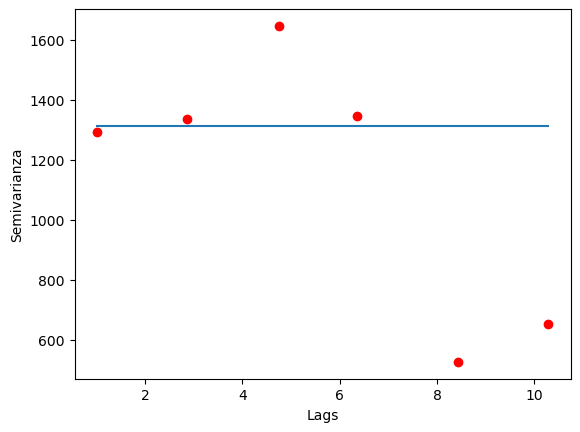

In [14]:
plt.plot(UK_lin.lags, UK_lin.get_variogram_points()[1])
plt.scatter(UK_lin.lags, UK_lin.semivariance, color="r")
plt.xlabel("Lags")
plt.ylabel("Semivarianza")

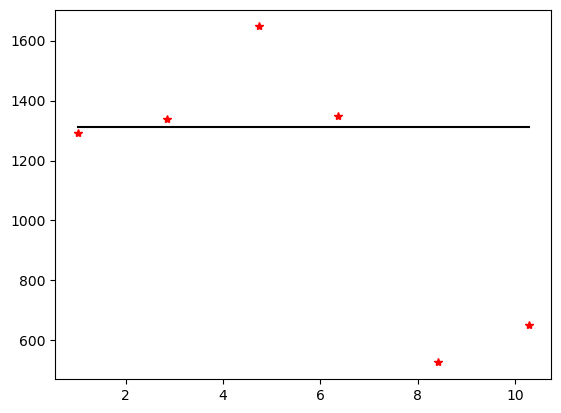

In [15]:
UK_lin.display_variogram_model()

In [16]:
UK_SV_lineal_xx = np.linspace(min(datos_arr[:, 0]), max(datos_arr[:, 0]), 1000)
UK_SV_lineal_yy = np.linspace(min(datos_arr[:, 1]), max(datos_arr[:, 1]), 1000)

In [17]:
z_lineal, ss_lineal = UK_lin.execute("grid", UK_SV_lineal_xx, UK_SV_lineal_yy)

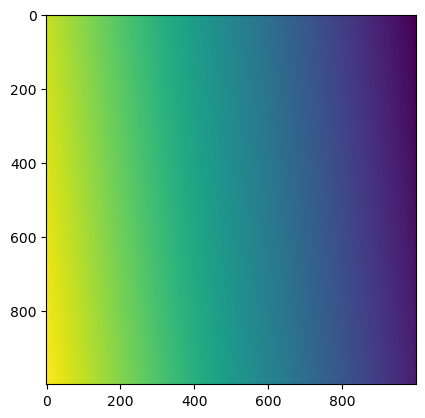

In [18]:
plt.imshow(z_lineal)
plt.show()

In [19]:
z_lineal

masked_array(
  data=[[107.08629380367337, 107.00017508187818, 106.914056360083, ...,
         21.225928173866397, 21.13980945207104, 21.053690730275978],
        [107.09437280914366, 107.00825408734852, 106.92213536555322, ...,
         21.234007179336775, 21.147888457541416, 21.061769735746356],
        [107.10245181461393, 107.01633309281877, 106.93021437102358, ...,
         21.242086184807196, 21.155967463011844, 21.069848741216806],
        ...,
        [115.14106225768172, 115.05494353588647, 114.96882481409112, ...,
         29.28069662787488, 29.194577906079523, 29.108459184284467],
        [115.14914126315209, 115.06302254135701, 114.97690381956161, ...,
         29.288775633345278, 29.202656911549926, 29.116538189754877],
        [115.15722026862254, 115.07110154682736, 114.98498282503208, ...,
         29.296854638815688, 29.21073591702035, 29.12461719522545]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],


In [20]:
ss_lineal

masked_array(
  data=[[1621.6445231423113, 1621.1723489317005, 1620.7006241487788, ...,
         1374.0303804304583, 1374.00628562802, 1373.9826402532626],
        [1621.2042398886642, 1620.7323016631308, 1620.2608128652873, ...,
         1373.8253743001387, 1373.801515482778, 1373.7781060930997],
        [1620.764426346007, 1620.2927241055518, 1619.8214712927875, ...,
         1373.6208378808094, 1373.5972150485272, 1373.574041643928],
        ...,
        [1415.8964375083906, 1415.659540421107, 1415.423092761513, ...,
         1402.8535867541352, 1403.0647690750245, 1403.2764008235947],
        [1415.9244560986258, 1415.6877949964223, 1415.4515833219057, ...,
         1403.1168824676981, 1403.3283007736657, 1403.5401685073148],
        [1415.9529443998385, 1415.716519282712, 1415.480543593275, ...,
         1403.3806478922381, 1403.5923021832843, 1403.804405902051]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
    

In [21]:
UK_lin = UniversalKriging(
    datos_arr[:, 0],
    datos_arr[:, 1],
    datos_arr[:, 2],
    variogram_model="linear",
    drift_terms=["regional_linear"],
    variogram_parameters=  {'slope': 0.1, 'nugget': 1300},
    nlags=4
)

Text(0, 0.5, 'Semivarianza')

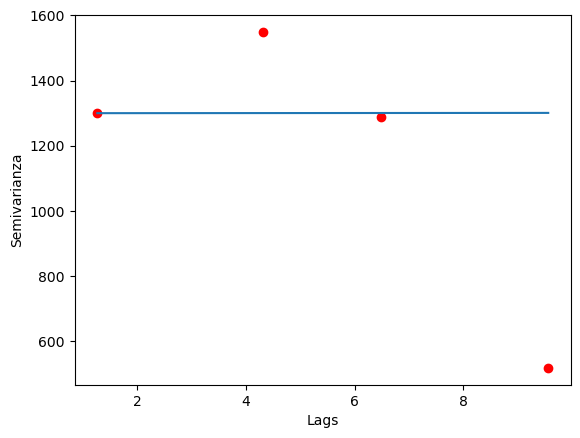

In [22]:
plt.plot(UK_lin.lags, UK_lin.get_variogram_points()[1])
plt.scatter(UK_lin.lags, UK_lin.semivariance, color="r")
plt.xlabel("Lags")
plt.ylabel("Semivarianza")

## <font style="color: red"> Modelo potencial</font>

In [23]:
UK_pow = UniversalKriging(
    datos_arr[:, 0],
    datos_arr[:, 1],
    datos_arr[:, 2],
    variogram_model="power",
    drift_terms=["regional_linear"]
)

In [24]:
UK_pow.get_statistics()

(0.44543606161143984, 1.0507902312000599, 1420.2057083763734)

Text(0, 0.5, 'Semivarianza')

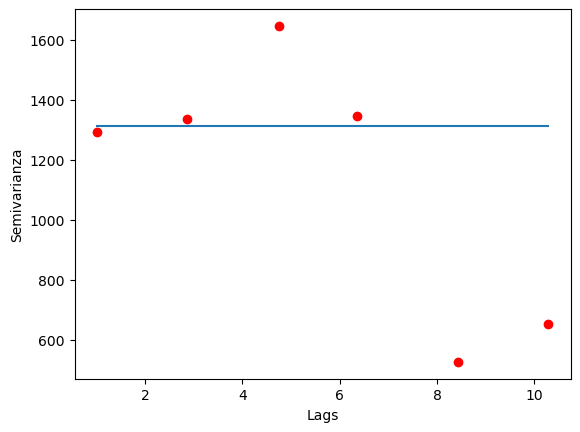

In [25]:
plt.plot(UK_pow.lags, UK_pow.get_variogram_points()[1])
plt.scatter(UK_pow.lags, UK_pow.semivariance, color="r")
plt.xlabel("Lags")
plt.ylabel("Semivarianza")

In [26]:
UK_SV_pow_xx = np.linspace(min(datos_arr[:, 0]), max(datos_arr[:, 0]), 1000)
UK_SV_pow_yy = np.linspace(min(datos_arr[:, 1]), max(datos_arr[:, 1]), 1000)

In [27]:
z_pow, ss_pow = UK_pow.execute("grid", UK_SV_pow_xx, UK_SV_pow_yy)

In [28]:
z_pow

masked_array(
  data=[[107.0863068870655, 107.00018816369877, 106.91406944033179, ...,
         21.225945579037475, 21.139826825280686, 21.053708071693254],
        [107.09438585755855, 107.00826713416889, 106.92214841077934, ...,
         21.234024563974742, 21.147905809507552, 21.061787055227743],
        [107.10246482805111, 107.01634610463876, 106.93022738122657, ...,
         21.24210354817352, 21.15598479298245, 21.069866038000008],
        ...,
        [115.14104276333855, 115.05492402997916, 114.96880529655527, ...,
         29.280684457030574, 29.194565739032978, 29.108447020990603],
        [115.14912172717725, 115.0630029938055, 114.97688426036888, ...,
         29.288763402209852, 29.202644684263298, 29.116525966272405],
        [115.15720069127181, 115.0710819578897, 114.98496322444268, ...,
         29.296842347567335, 29.210723629671243, 29.124604911730252]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],

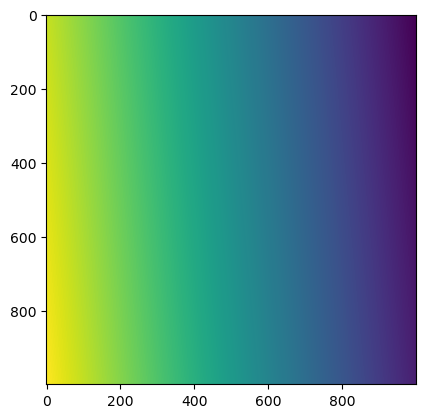

In [29]:
plt.imshow(z_pow)
plt.show()

## <font style="color: red"> Modelo Gausiano</font>

In [30]:
UK_gaus = UniversalKriging(
    datos_arr[:, 0],
    datos_arr[:, 1],
    datos_arr[:, 2],
    variogram_model="gaussian"
)

In [31]:
UK_gaus.get_statistics() 

(0.037624967171328016, 0.6076313951177408, 428.90807370574333)

Text(0, 0.5, 'Semivarianza')

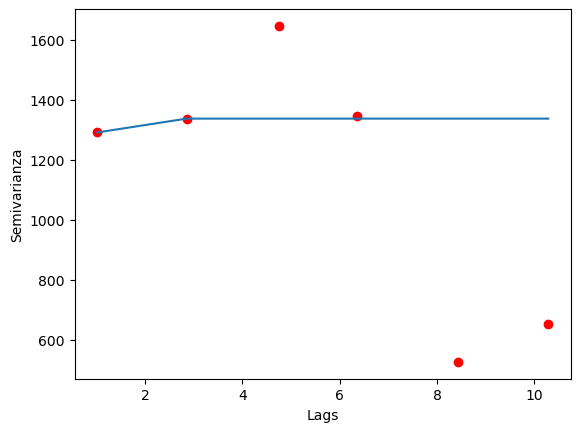

In [32]:
plt.plot(UK_gaus.lags, UK_gaus.get_variogram_points()[1])
plt.scatter(UK_gaus.lags, UK_gaus.semivariance, color="r")
plt.xlabel("Lags")
plt.ylabel("Semivarianza")

In [33]:
UK_SV_gaus_xx = np.linspace(min(datos_arr[:, 0]), max(datos_arr[:, 0]), 1000)
UK_SV_gaus_yy = np.linspace(min(datos_arr[:, 1]), max(datos_arr[:, 1]), 1000)

In [34]:
z_gaus, ss_gaus = UK_gaus.execute("grid", UK_SV_gaus_xx, UK_SV_gaus_yy)

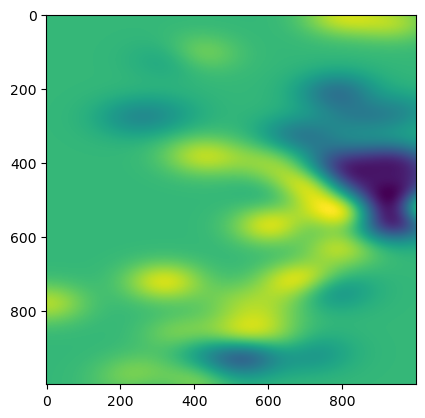

In [35]:
plt.imshow(z_gaus)
plt.show()

## <font style="color: red"> Modelo esférico</font>

In [36]:
UK_spher = UniversalKriging(
    datos_arr[:, 0],
    datos_arr[:, 1],
    datos_arr[:, 2],
    variogram_model="spherical"
)

In [37]:
UK_spher.get_statistics() 

(0.06841797189218446, 0.4977556019102947, 397.8907627304582)

Text(0, 0.5, 'Semivarianza')

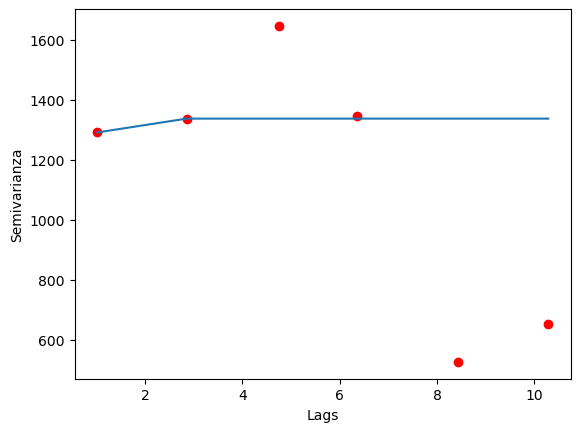

In [38]:
plt.plot(UK_spher.lags, UK_spher.get_variogram_points()[1])
plt.scatter(UK_spher.lags, UK_spher.semivariance, color="r")
plt.xlabel("Lags")
plt.ylabel("Semivarianza")

In [39]:
UK_SV_spher_xx = np.linspace(min(datos_arr[:, 0]), max(datos_arr[:, 0]), 1000)
UK_SV_spher_yy = np.linspace(min(datos_arr[:, 1]), max(datos_arr[:, 1]), 1000)

In [40]:
z_spher, ss_spher = UK_spher.execute("grid", UK_SV_spher_xx, UK_SV_spher_yy)

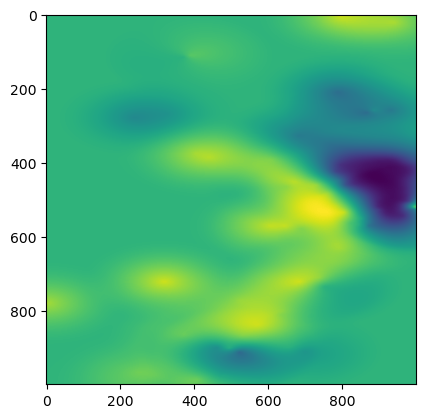

In [41]:
plt.imshow(z_spher)
plt.show()

## <font style="color: red"> Modelo exponencial</font>

In [42]:
UK_exp = UniversalKriging(
    datos_arr[:, 0],
    datos_arr[:, 1],
    datos_arr[:, 2],
    variogram_model="exponential"
)

In [43]:
UK_exp.get_statistics()

(0.11430861399571497, 0.44891655566655375, 416.8873428649023)

Text(0, 0.5, 'Semivarianza')

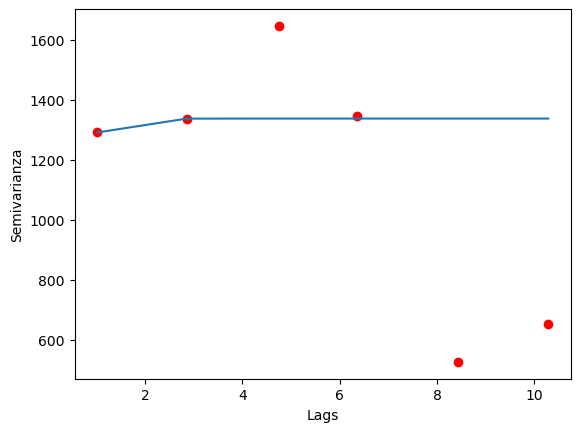

In [44]:
plt.plot(UK_exp.lags, UK_exp.get_variogram_points()[1])
plt.scatter(UK_exp.lags, UK_exp.semivariance, color="r")
plt.xlabel("Lags")
plt.ylabel("Semivarianza")

In [45]:
UK_SV_exp_xx = np.linspace(min(datos_arr[:, 0]), max(datos_arr[:, 0]), 1000)
UK_SV_exp_yy = np.linspace(min(datos_arr[:, 1]), max(datos_arr[:, 1]), 1000)

In [46]:
z_exp, ss_exp = UK_exp.execute("grid", UK_SV_exp_xx, UK_SV_exp_yy)

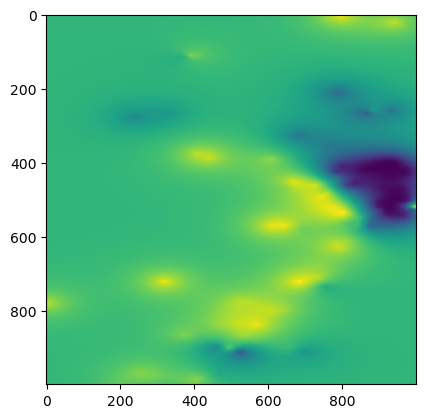

In [47]:
plt.imshow(z_exp)
plt.show()

## <font style="color: red"> Modelo hole-effect</font>

In [48]:
UK_hole = UniversalKriging(
    datos_arr[:, 0],
    datos_arr[:, 1],
    datos_arr[:, 2],
    variogram_model="hole-effect"
)

C:\Users\valiz\anaconda3\Lib\site-packages\pykrige\core.py:825: RuntimeWarning: invalid value encountered in sqrt
  sigma[i] = np.sqrt(ss)


In [49]:
UK_hole.get_statistics() #  {'sill': s, 'range': r, 'nugget': n}

(0.31269605125272226, 160.694846938294, 55835.44337155493)

Text(0, 0.5, 'Semivarianza')

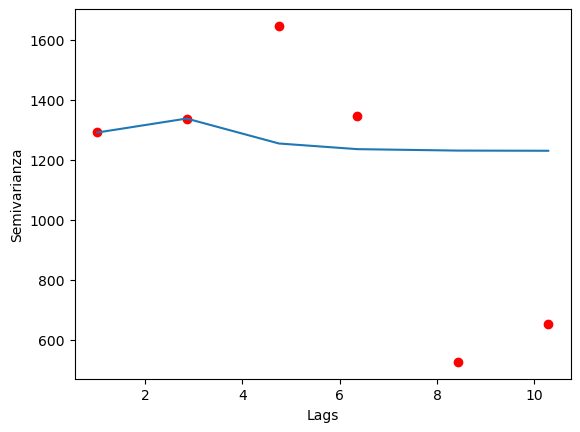

In [50]:
plt.plot(UK_hole.lags, UK_hole.get_variogram_points()[1])
plt.scatter(UK_hole.lags, UK_hole.semivariance, color="r")
plt.xlabel("Lags")
plt.ylabel("Semivarianza")

In [51]:
UK_SV_hole_xx = np.linspace(min(datos_arr[:, 0]), max(datos_arr[:, 0]), 1000)
UK_SV_hole_yy = np.linspace(min(datos_arr[:, 1]), max(datos_arr[:, 1]), 1000)

In [52]:
z_hole, ss_hole = UK_hole.execute("grid", UK_SV_hole_xx, UK_SV_hole_yy)

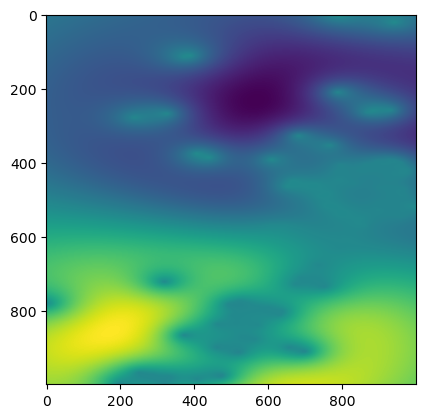

In [53]:
plt.imshow(z_hole)
plt.show()

# <font style="color:#F50AFA; background-color:#FAF70A" >GRÁFICOS COMPARACIÓN</font>

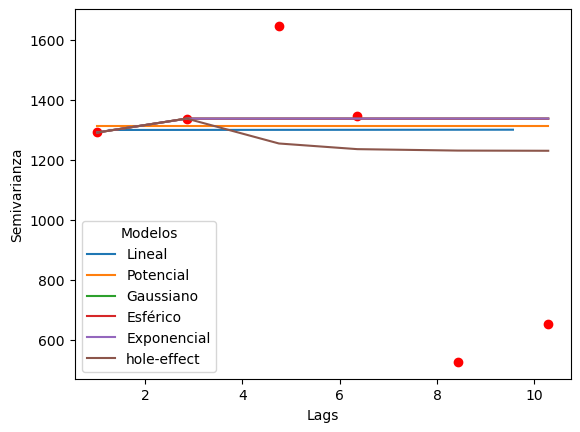

In [54]:
plt.plot(UK_lin.lags, UK_lin.get_variogram_points()[1], label="Lineal")
plt.plot(UK_pow.lags, UK_pow.get_variogram_points()[1], label="Potencial")
plt.plot(UK_gaus.lags, UK_gaus.get_variogram_points()[1], label="Gaussiano")
plt.plot(UK_spher.lags, UK_spher.get_variogram_points()[1], label="Esférico")
plt.plot(UK_exp.lags, UK_exp.get_variogram_points()[1], label="Exponencial")
plt.plot(UK_hole.lags, UK_hole.get_variogram_points()[1], label="hole-effect")
plt.scatter(UK_hole.lags, UK_hole.semivariance, color="r")
plt.xlabel("Lags")
plt.ylabel("Semivarianza")
plt.legend(title="Modelos")

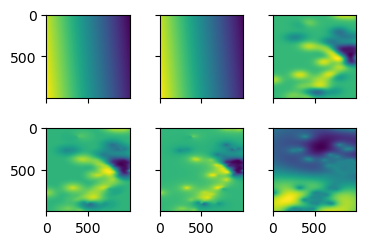

In [55]:
# nombres=["z_lineal", "z_pow", "z_gaus", "z_spher", "z_exp", "z_hole"]
fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(2, 3),  
                 axes_pad=0.3, 
                 )

for ax, im in zip(grid, [z_lineal, z_pow, z_gaus, z_spher, z_exp, z_hole]):
    ax.imshow(im)

plt.show()

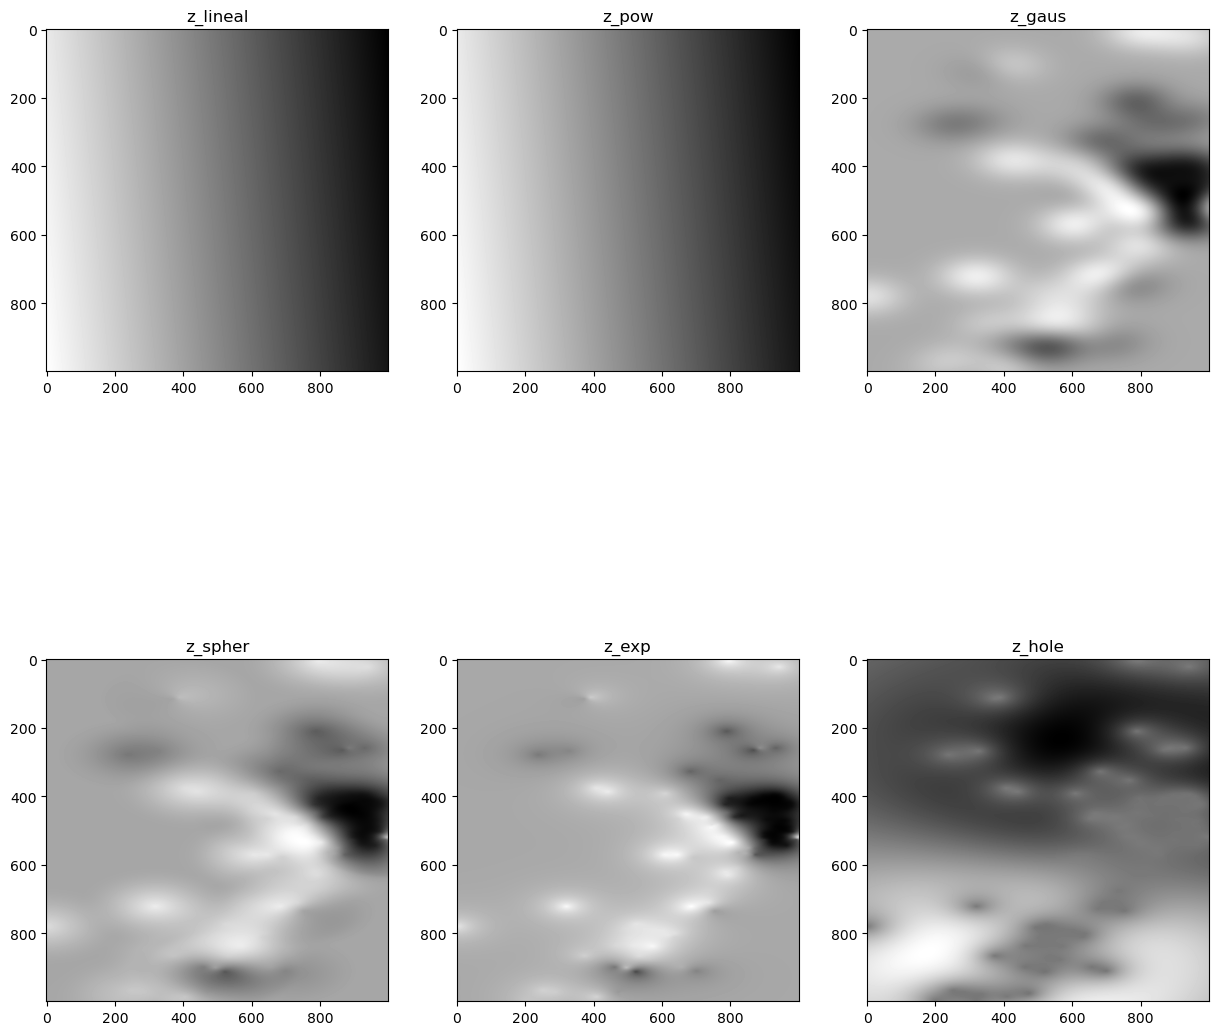

In [56]:
nombres=["z_lineal", "z_pow", "z_gaus", "z_spher", "z_exp", "z_hole"]
var=[z_lineal, z_pow, z_gaus, z_spher, z_exp, z_hole]
fig,ax = plt.subplots(2,3,figsize = (15,15))
ax = ax.ravel()
for i in range(6):
    ax[i].imshow(var[i],cmap = 'gray')
    ax[i].set_title(nombres[i]) 
plt.show()

In [57]:
Datos_gdf = gpd.GeoDataFrame(
    Datos, geometry=gpd.points_from_xy(Datos.long, Datos.lat), crs="EPSG:4326"
)

In [58]:
UK_SV_exp_xxa = np.linspace(min(datos_arr[:, 0]), max(datos_arr[:, 0]), 10)
UK_SV_exp_yyb = np.linspace(min(datos_arr[:, 1]), max(datos_arr[:, 1]), 10)

In [59]:
xy = []
for i in range(10):
    for j in range(10):
        xy.append([UK_SV_exp_xxa[i],UK_SV_exp_yyb[j]])

In [60]:
xy = np.array(xy)

In [61]:
xy.sort()

In [62]:
xy

array([[-37.908333  , 110.25      ],
       [-36.69399967, 110.25      ],
       [-35.47966633, 110.25      ],
       [-34.265333  , 110.25      ],
       [-33.05099967, 110.25      ],
       [-31.83666633, 110.25      ],
       [-30.622333  , 110.25      ],
       [-29.40799967, 110.25      ],
       [-28.19366633, 110.25      ],
       [-26.979333  , 110.25      ],
       [-37.908333  , 110.85804778],
       [-36.69399967, 110.85804778],
       [-35.47966633, 110.85804778],
       [-34.265333  , 110.85804778],
       [-33.05099967, 110.85804778],
       [-31.83666633, 110.85804778],
       [-30.622333  , 110.85804778],
       [-29.40799967, 110.85804778],
       [-28.19366633, 110.85804778],
       [-26.979333  , 110.85804778],
       [-37.908333  , 111.46609556],
       [-36.69399967, 111.46609556],
       [-35.47966633, 111.46609556],
       [-34.265333  , 111.46609556],
       [-33.05099967, 111.46609556],
       [-31.83666633, 111.46609556],
       [-30.622333  , 111.46609556],
 

In [63]:
z_expa, ss_expb = UK_exp.execute("grid", UK_SV_exp_xxa, UK_SV_exp_yyb)

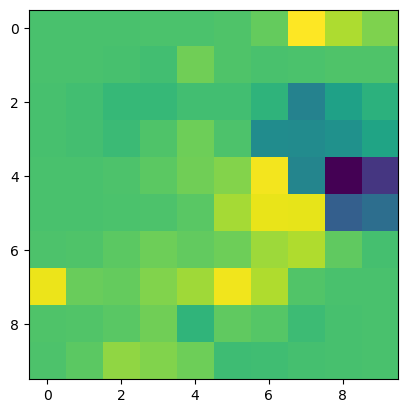

In [64]:
plt.imshow(z_expa)
plt.show()

In [65]:
Datos_gdf_UK_exp = pd.DataFrame({"long":xy[:,0],"lat":xy[:,1]})

In [66]:
Datos_gdf_UK_exp

,long,lat
0,-37.908333,110.25000
1,-36.694000,110.25000
2,-35.479666,110.25000
3,-34.265333,110.25000
4,-33.051000,110.25000
...,...,...
95,-31.836666,115.72243
96,-30.622333,115.72243
97,-29.408000,115.72243
98,-28.193666,115.72243


In [67]:
Datos_gdf_UK_exp.set_index("long",inplace=True)

In [68]:
Datos_gdf_UK_exp=Datos_gdf_UK_exp.sort_index(ascending=False)
Datos_gdf_UK_exp

,lat
long,
-26.979333,115.722430
-26.979333,110.250000
-26.979333,114.506334
-26.979333,113.898287
-26.979333,113.290239
...,...
-37.908333,112.682191
-37.908333,112.074143
-37.908333,111.466096


In [69]:
Datos_gdf_UK_exp=Datos_gdf_UK_exp.reset_index()


In [70]:
Datos_gdf_UK_exp

,long,lat
0,-26.979333,115.722430
1,-26.979333,110.250000
2,-26.979333,114.506334
3,-26.979333,113.898287
4,-26.979333,113.290239
...,...,...
95,-37.908333,112.682191
96,-37.908333,112.074143
97,-37.908333,111.466096
98,-37.908333,110.858048


In [71]:
Datos_gdf_UK_exp.set_index("lat",inplace=True)

In [72]:
Datos_gdf_UK_exp

,long
lat,
115.722430,-26.979333
110.250000,-26.979333
114.506334,-26.979333
113.898287,-26.979333
113.290239,-26.979333
...,...
112.682191,-37.908333
112.074143,-37.908333
111.466096,-37.908333


In [73]:
Datos_gdf_UK_exp=Datos_gdf_UK_exp.sort_index(ascending=True)

In [74]:
Datos_gdf_UK_exp

,long
lat,
110.25000,-37.908333
110.25000,-33.051000
110.25000,-30.622333
110.25000,-34.265333
110.25000,-29.408000
...,...
115.72243,-30.622333
115.72243,-29.408000
115.72243,-28.193666


In [75]:
Datos_gdf_UK_exp = Datos_gdf_UK_exp.reset_index()
Datos_gdf_UK_exp

,lat,long
0,110.25000,-37.908333
1,110.25000,-33.051000
2,110.25000,-30.622333
3,110.25000,-34.265333
4,110.25000,-29.408000
...,...,...
95,115.72243,-30.622333
96,115.72243,-29.408000
97,115.72243,-28.193666
98,115.72243,-36.694000


In [76]:
Datos_gdf_UK_exp["mud"]= z_expa.data.flatten()

In [77]:
Datos_gdf_UK_exp

,lat,long,mud
0,110.25000,-37.908333,57.632408
1,110.25000,-33.051000,57.636756
2,110.25000,-30.622333,57.676498
3,110.25000,-34.265333,57.823449
4,110.25000,-29.408000,57.986625
...,...,...,...
95,115.72243,-30.622333,55.967161
96,115.72243,-29.408000,56.325635
97,115.72243,-28.193666,56.929206
98,115.72243,-36.694000,57.412901


In [78]:
Datos_gdf_UK_exp = gpd.GeoDataFrame(
    Datos_gdf_UK_exp, geometry=gpd.points_from_xy(Datos_gdf_UK_exp.long, Datos_gdf_UK_exp.lat), crs="EPSG:4326"
)

In [79]:
Datos_gdf.explore(column="mud")

In [80]:
Datos_gdf_UK_exp.explore(column="mud")

In [81]:
#gdf.to_file('dataframe.shp')  

# <font style="color:#F50AFA; background-color:#FAF70A" >INFORMACIÓN</font>

In [82]:
#https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/variogram_models.html

In [83]:
#https://pro.arcgis.com/es/pro-app/latest/tool-reference/3d-analyst/how-kriging-works.htm

In [84]:
#https://www.redalyc.org/pdf/2235/223515971005.pdf

In [85]:
#https://www.researchgate.net/publication/361840268_Introduccion_al_analisis_geoestadistico_de_datos_en_geociencias_teoria_y_aplicacionv

In [ ]:
#https://rubenfcasal.github.io/estadistica_espacial/ksimple.html

In [ ]:
#https://alfageomatics.com/2019/12/geoestadistica-iii-kriging/